In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data_path = 'data_set/Salary_dataset.csv'

if os.path.exists(data_path):
    print('File found')
    print('Importing data')
    data = pd.read_csv(data_path)
    print('Done importing')
else:
    print('No such file or directory')
    exit()

File found
Importing data
Done importing


In [6]:
data = np.array(data)
m, n = data.shape

experiance = data[:, 1]
real_salary = data[:, 2]

In [4]:
def forward_prob_linear(experiance, phi_0, phi_1):

    return phi_0 + (phi_1 * experiance)

def loss_function(real_salary, expected_salary):

    return  np.sum(np.square(expected_salary-real_salary))

def gradient_vector(real_salary, expected_salary, experiance):

    phi_0_gradient = np.sum(2 * (expected_salary-real_salary))
    phi_1_gradient = np.sum(2 * experiance * (expected_salary-real_salary))

    return phi_0_gradient, phi_1_gradient

def prams_init():

    phi_0 = np.random.rand()*20000
    phi_1 = np.random.rand()*10000

    return phi_0, phi_1

def prams_update(phi_0_gradient, phi_1_gradient, alpha, phi_0, phi_1):

    phi_0 = phi_0 - alpha * phi_0_gradient
    phi_1 = phi_1 - alpha * phi_1_gradient
    
    return phi_0, phi_1


In [40]:
phi_0, phi_1 = prams_init()
alpha = 0.0005
iterations = 10000
loss_history = []
phi_0_history=[]
phi_1_history=[]

print(f'phi_0={phi_0},phi_1={phi_1}')

phi_0_history.append(phi_0)
phi_1_history.append(phi_1)

for i in range(iterations):
    expected_salary = forward_prob_linear(experiance, phi_0, phi_1)
    loss = loss_function(real_salary, expected_salary)
    loss_history.append(loss)
    phi_0_gradient, phi_1_gradient = gradient_vector(real_salary, expected_salary, experiance)
    phi_0, phi_1 = prams_update(phi_0_gradient, phi_1_gradient, alpha, phi_0, phi_1)
    phi_0_history.append(phi_0)
    phi_1_history.append(phi_1)

    if i % 500 == 0:  # Print every 100 iterations
        print(f'Iteration {i}: Loss = {loss}, phi_0 = {phi_0}, phi_1 = {phi_1}')



phi_0=16832.050334127212,phi_1=7079.9016541024685
Iteration 0: Loss = 15286823020.271107, phi_0 = 17457.432795477154, phi_1 = 11018.844107353476
Iteration 500: Loss = 938860289.5959061, phi_0 = 24509.440219428798, phi_1 = 9499.68169591351
Iteration 1000: Loss = 938130060.473615, phi_0 = 24832.821154637044, phi_1 = 9452.220012223203
Iteration 1500: Loss = 938128554.7795055, phi_0 = 24847.505453463407, phi_1 = 9450.064840194704
Iteration 2000: Loss = 938128551.6748431, phi_0 = 24848.17224797273, phi_1 = 9449.966976694903
Iteration 2500: Loss = 938128551.6684417, phi_0 = 24848.20252622593, phi_1 = 9449.962532843336
Iteration 3000: Loss = 938128551.6684284, phi_0 = 24848.2039011212, phi_1 = 9449.962331053937
Iteration 3500: Loss = 938128551.6684283, phi_0 = 24848.20396355336, phi_1 = 9449.96232189095
Iteration 4000: Loss = 938128551.6684282, phi_0 = 24848.20396638832, phi_1 = 9449.96232147487
Iteration 4500: Loss = 938128551.6684285, phi_0 = 24848.203966517063, phi_1 = 9449.962321455974
It

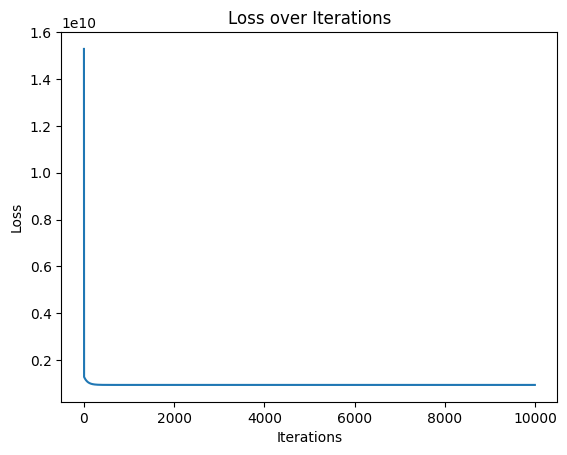

In [41]:

plt.plot(range(iterations), loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss over Iterations')
plt.show()

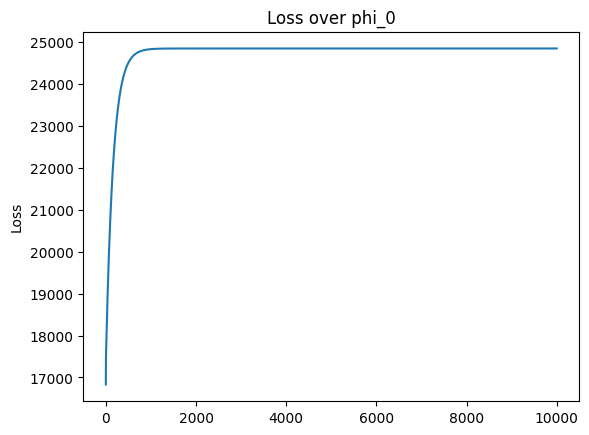

In [42]:
plt.plot(range(iterations+1), phi_0_history)
plt.xlabel('')
plt.ylabel('Loss')
plt.title('Loss over phi_0')
plt.show()

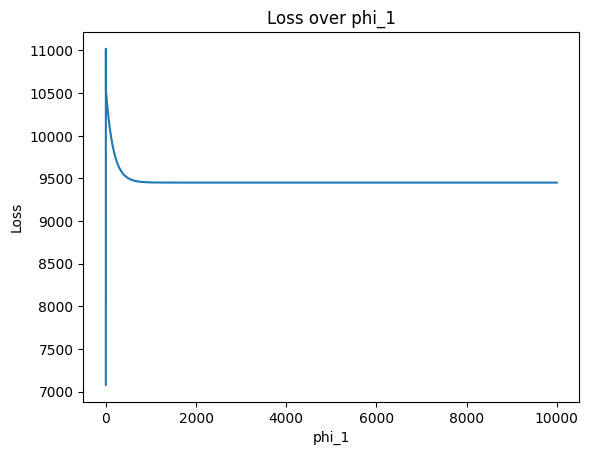

In [43]:
plt.plot(range(iterations+1), phi_1_history)
plt.xlabel('phi_1')
plt.ylabel('Loss')
plt.title('Loss over phi_1')
plt.show()